## i. Introduction

By: [George Kenji Putra](https://github.com/georgekenjiputra)

Dataset: **Telecom Customer Churn**

The dataset is taken from Kaggle; this dataset contains information on all about 7,000 customers from a Telecommunications company in California in Q2 2022. Each record represents one customer, and contains details about their `demographics`, `location`, `tenure`, `subscription services`, `status for the quarter` (joined, stayed, or churned), and more. For more information, kindly visit [here](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics).

Objective: The project aims to predict customer churn using machine learning. By analyzing historical customer data, the model identifies patterns to determine which customers are likely to stop using the company's services.

Deployment : For model deployment, please visit here: [Hugging Face](https://huggingface.co/spaces/agayabag/deploy_churn_prediction).

## ii. Importing Libraries

In [115]:
# importing libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import phik

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline

import warnings
warnings.filterwarnings(action='ignore')

## iii. Data Loading and Overview

### iii.i Data Loading and Its General Information

Here is the detailed information regarding every column in the dataset:

| Feature                               | Description                                                                                             |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| `Customer ID`                         | A unique ID that identifies each customer                                                                    |
| `Gender`                              | The customer's gender: Male, Female                    |
| `Age`                                 | The customer's current age, in years, at the time the fiscal quarter ended (Q2 2022)                           |
| `Married`                             | Indicates if the customer is married: Yes, No                                  |
| `Number of Dependents`                | Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.) |
| `City`                                | The city of the customer's primary residence in California                              |
| `Zip Code`                            | The zip code of the customer's primary residence                              |
| `Latitude`                            | The latitude of the customer's primary residence                         |
| `Longitude`                           | The longitude of the customer's primary residence                             |
| `Number of Referrals`                 | Indicates the number of times the customer has referred a friend or family member to this company to date                                                  |
| `Tenure in Months`                    | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above                                 |
| `Offer`                               | Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E                                                |
| `Phone Service`                       | Indicates if the customer subscribes to home phone service with the company: Yes, No          |
| `Avg Monthly Long Distance Charges`   | Indicates the customer's average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)                                                                    |
| `Multiple Lines`                      | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)                    |
| `Internet Service`                    | Indicates if the customer subscribes to Internet service with the company: Yes, No                           |
| `Internet Type`                       | Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)                                 |
| `Avg Monthly GB Download`             | Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0) |
| `Online Security`                     | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)                              |
| `Online Backup`                       | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)                              |
| `Device Protection Plan`              | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)                         |
| `Premium Tech Support`                | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)                            |
| `Streaming TV`                        | Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)                                                  |
| `Streaming Movies`                    | Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)                                |
| `Streaming Music`                     | Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)                                                |
| `Unlimited Data`                      | Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)          |
| `Contract`                            | Indicates the customer's current contract type: Month-to-Month, One Year, Two Year                                                                    |
| `Paperless Billing`                   | Indicates if the customer has chosen paperless billing: Yes, No                    |
| `Payment Method`                      | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check                           |
| `Monthly Charge`                      | Indicates the customer's current total monthly charge for all their services from the company                                  |
| `Total Charges`                       | Indicates the customer's total charges, calculated to the end of the quarter specified above |
| `Total Refunds`                       | Indicates the customer's total refunds, calculated to the end of the quarter specified above                              |
| `Total Extra Data Charges`            | Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above                              |
| `Total Long Distance Charges`         | Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter specified above                         |
| `Total Revenue`                       | Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)                             |
| `Customer Status`                     | Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined                                                  |
| `Churn Category`                      | A high-level category for the customer's reason for churning, which is asked when they leave the company: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)                                 |
| `Churn Reason`                        | A customer's specific reason for leaving the company, which is asked when they leave the company (directly related to Churn Category)                                                |

In [116]:
# loading and assigning the dataset as df, then showing the first 10 data for general overview

df = pd.read_csv('Customer Churn Prediction - ML.csv')
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [117]:
# showing the last 10 data to gain more information

df.tail(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,...,Bank Withdrawal,84.95,4018.05,0.0,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


In [118]:
# checking general information regarding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

From informations above, we know that:

* The dataset has 7,043 entries or row.
* The dataset has the total of 38 columns.
* The dataset has three data types within it, which are float (9 columns), integer (6 columns), and object (23 columns).
* There are missing values in this dataset.

In [119]:
# manipulating column names for ease in calling them throughout the project

df.columns=df.columns.str.replace(' ','_').str.lower()

df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


### iii.ii Checking and Handling Duplicated Rows

In [120]:
# checking duplicated rows in the dataset

df.duplicated().sum()

0

<mark>No duplicates</mark> in this dataset, we can proceed without deleting any data.

### iii.iii Checking and Handling Missing Values (If Needed)

In [121]:
# checking missing values in the dataset

df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                   0
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

There are <mark>a lot of missing values</mark> in this data. We will handle those here.

Given that the dataset originates from a telecommunications company offering two primary services, namely Phone Service and Internet Service, it is important to note that <mark>not all customers necessarily subscribe to both services</mark>. Consequently, the presence of null values within the dataset is attributed to the absence of service provision for specific customers.

We will start with `avg_monthly_long_distance_charges`. As the column information suggests, *if the customer is not subscribed to home phone service, this will be 0*. Hence, we will impute the missing values with 0.

In [122]:
# checking the avg_monthly_long_distance_charges missing value rows

selected_columns1 = ['customer_id', 'avg_monthly_long_distance_charges', 'phone_service']
missing_rows1 = df[df['avg_monthly_long_distance_charges'].isnull()][selected_columns1]

print(missing_rows1)

     customer_id  avg_monthly_long_distance_charges phone_service
10    0017-DINOC                                NaN            No
14    0019-GFNTW                                NaN            No
16    0020-JDNXP                                NaN            No
19    0023-HGHWL                                NaN            No
25    0032-PGELS                                NaN            No
...          ...                                ...           ...
6979  9906-NHHVC                                NaN            No
6980  9907-SWKKF                                NaN            No
6996  9928-BZVLZ                                NaN            No
7016  9955-QOPOY                                NaN            No
7042  9995-HOTOH                                NaN            No

[682 rows x 3 columns]


In [123]:
# filling the missing values for avg_monthly_long_distance_charges column with 0

df.avg_monthly_long_distance_charges = df.avg_monthly_long_distance_charges.fillna(0.0)

Same goes with `multiple_lines`. As the column information suggests, *if the customer is not subscribed to home phone service, this will be No*. Hence, we will impute the missing values with a <mark>No</mark>.

In [124]:
# checking the multiple_lines missing value rows

selected_columns2 = ['customer_id', 'multiple_lines', 'phone_service']
missing_rows2 = df[df['multiple_lines'].isnull()][selected_columns2]

print(missing_rows2)

     customer_id multiple_lines phone_service
10    0017-DINOC            NaN            No
14    0019-GFNTW            NaN            No
16    0020-JDNXP            NaN            No
19    0023-HGHWL            NaN            No
25    0032-PGELS            NaN            No
...          ...            ...           ...
6979  9906-NHHVC            NaN            No
6980  9907-SWKKF            NaN            No
6996  9928-BZVLZ            NaN            No
7016  9955-QOPOY            NaN            No
7042  9995-HOTOH            NaN            No

[682 rows x 3 columns]


In [125]:
# filling the missing values for multiple_lines column with a No

df.multiple_lines = df.multiple_lines.fillna('No')

Next, we do the same process with `avg_monthly_gb_download`. As the column information suggests, *if the customer is not subscribed to internet service, this will be 0*. Hence, we will impute the missing values with 0.

In [126]:
# checking the avg_monthly_gb_download missing value rows

selected_columns3 = ['customer_id', 'avg_monthly_gb_download', 'internet_service']
missing_rows3 = df[df['avg_monthly_gb_download'].isnull()][selected_columns3]

print(missing_rows3)

     customer_id  avg_monthly_gb_download internet_service
20    0023-UYUPN                      NaN               No
23    0030-FNXPP                      NaN               No
24    0031-PVLZI                      NaN               No
27    0040-HALCW                      NaN               No
28    0042-JVWOJ                      NaN               No
...          ...                      ...              ...
7026  9970-QBCDA                      NaN               No
7028  9972-EWRJS                      NaN               No
7032  9975-GPKZU                      NaN               No
7033  9975-SKRNR                      NaN               No
7037  9986-BONCE                      NaN               No

[1526 rows x 3 columns]


In [127]:
# filling the missing values for avg_monthly_gb_download column with 0

df.avg_monthly_gb_download =df.avg_monthly_gb_download.fillna(0)

In the context of the internet package plans offered by the company, the presence of missing values can be attributed to customers who have not subscribed to the internet service. To further investigate this, we will focus on two columns to streamline the analysis, considering time constraints. The selected columns for examination are `internet_type` and `unlimited_data`.

In [128]:
# checking the internet_type missing value rows

selected_columns4 = ['customer_id', 'internet_type', 'internet_service']
missing_rows4 = df[df['internet_type'].isnull()][selected_columns4]

print(missing_rows4)

     customer_id internet_type internet_service
20    0023-UYUPN           NaN               No
23    0030-FNXPP           NaN               No
24    0031-PVLZI           NaN               No
27    0040-HALCW           NaN               No
28    0042-JVWOJ           NaN               No
...          ...           ...              ...
7026  9970-QBCDA           NaN               No
7028  9972-EWRJS           NaN               No
7032  9975-GPKZU           NaN               No
7033  9975-SKRNR           NaN               No
7037  9986-BONCE           NaN               No

[1526 rows x 3 columns]


In [129]:
# checking the unlimited_data missing value rows

selected_columns5 = ['customer_id', 'unlimited_data', 'internet_service']
missing_rows5 = df[df['unlimited_data'].isnull()][selected_columns5]

print(missing_rows5)

     customer_id unlimited_data internet_service
20    0023-UYUPN            NaN               No
23    0030-FNXPP            NaN               No
24    0031-PVLZI            NaN               No
27    0040-HALCW            NaN               No
28    0042-JVWOJ            NaN               No
...          ...            ...              ...
7026  9970-QBCDA            NaN               No
7028  9972-EWRJS            NaN               No
7032  9975-GPKZU            NaN               No
7033  9975-SKRNR            NaN               No
7037  9986-BONCE            NaN               No

[1526 rows x 3 columns]


Hence we will fill the missing values on every internet package plan, with a <mark>No</mark>, as the column information suggests (*if the customer is not subscribed to internet service, this will be No*). The related columns are: `online_security`, `online_backup`, `device_protection_plan`, `premium_tech_support`, `streaming_tv`, `streaming_movies`, `streaming_music`, `unlimited_data`.

While for `internet_type`, we will impute the missing values with <mark>None</mark>, as the column infomation suggests (*if the customer is not subscribed to internet service, this will be None*)

In [130]:
# filling the missing values for several columns with a No

df.online_security = df.online_security.fillna('No')
df.online_backup = df.online_backup.fillna('No')
df.device_protection_plan = df.device_protection_plan.fillna('No')
df.premium_tech_support = df.premium_tech_support.fillna('No')
df.streaming_tv = df.streaming_tv.fillna('No')
df.streaming_movies = df.streaming_movies.fillna('No')
df.streaming_music = df.streaming_music.fillna('No')
df.unlimited_data = df.unlimited_data.fillna('No')

In [131]:
# filling the missing values for internet_type column with a None

df.internet_type = df.internet_type.fillna('None')

In [132]:
# checking back the missing values in the dataset after the handling

df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                   0
phone_service                           0
avg_monthly_long_distance_charges       0
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download                 0
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

Furthermore, the remaining columns, namely `churn_category` and `churn_reason`, are not expected to be utilized in the current analysis. Therefore, we will retain these columns in their existing state without addressing the missing values. It is worth noting that the rest of the columns in the dataset are now free of missing values and can be considered for further analysis and exploration.

### iii.iv Numerical Overview

In [133]:
# numerical overview

num_col = df.describe().columns.tolist()
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
number_of_dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
zip_code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
number_of_referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
tenure_in_months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
avg_monthly_long_distance_charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
avg_monthly_gb_download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
monthly_charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


In general, the data distribution of this dataset is <mark>Symmetrical Distribution</mark> if we compare the mean value with the median (50%) value. And also, there are a lot of outliers here since the difference between the max value and the 3rd (75%) quantile is so big. However, in order to ensure the distribution we have for our dataset, we need to check the skewness value, which we will do in the next section.

### iii.v Categorical Overview

In [134]:
# categorical overview

cat_col = df.select_dtypes(include=['object']).columns.tolist()

for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 40)

customer_id

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
----------------------------------------
gender

Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
married

No     3641
Yes    3402
Name: married, dtype: int64
----------------------------------------
city

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: city, Length: 1106, dtype: int64
----------------------------------------
offer

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: offer, dtype: int64
-------------------------------------

In [135]:
# categorical overview

for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  customer_id
Total unique labels:  7043
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  married
Total unique labels:  2
------------------------------
Column:  city
Total unique labels:  1106
------------------------------
Column:  offer
Total unique labels:  6
------------------------------
Column:  phone_service
Total unique labels:  2
------------------------------
Column:  multiple_lines
Total unique labels:  2
------------------------------
Column:  internet_service
Total unique labels:  2
------------------------------
Column:  internet_type
Total unique labels:  4
------------------------------
Column:  online_security
Total unique labels:  2
------------------------------
Column:  online_backup
Total unique labels:  2
------------------------------
Column:  device_protection_plan
Total unique labels:  2
------------------------------
Column:  premium_tech_support
Total unique labels:  2
---------------------

Based on the provided information, it is evident that the `city` column within the dataset exhibits a <mark>high level of cardinality</mark>. Having a high cardinality in the city column indicates that there are numerous distinct cities represented in the dataset. We will handle this in the next sections.

### iii.vi Checking and Handling Redundant Columns (If Needed)

In [136]:
# checking number of unique values in the dataset

df.nunique().sort_values(ascending = False)

customer_id                          7043
total_revenue                        6975
total_charges                        6540
total_long_distance_charges          6068
avg_monthly_long_distance_charges    3584
zip_code                             1626
latitude                             1626
longitude                            1625
monthly_charge                       1591
city                                 1106
total_refunds                         500
tenure_in_months                       72
age                                    62
avg_monthly_gb_download                50
churn_reason                           20
total_extra_data_charges               16
number_of_referrals                    12
number_of_dependents                   10
offer                                   6
churn_category                          5
internet_type                           4
contract                                3
customer_status                         3
payment_method                    

In our analysis, we have identified several columns that are not relevant to the current scope. Although they might be useful for exploratory data analysis (EDA) purposes, we have decided to drop them from our analysis due to the following reasons:

* `customer_id`: This column is used solely for the purpose of uniquely identifying records. As it does not provide any meaningful insights for our analysis, it is safe to remove from the dataset.

* `churn_category` and `churn_reason`: As previously mentioned, these columns fall outside the scope of our analysis. While they may hold valuable information related to customer churn, they are not pertinent to the specific objectives we are addressing in this analysis.

* `longitude`, `latitude`, and `zip_code`: The information represented by these columns, such as geographical location and zip code, is already adequately captured by the `city` column. Since redundancy exists among these features, we can safely exclude them from our analysis to avoid duplication of information.

Furthermore, we have chosen to exclude customers who recently `Joined`, specifically those who joined in the previous quarter, from the churn prediction analysis. This decision is based on the <mark>limited historical data</mark> available for just joined clients, which makes it challenging to accurately predict churn. 

Additionally, their <mark>incomplete customer lifecycle</mark> and <mark>potentially different behavior</mark> compared to longer-tenured customers can introduce noise or bias in the analysis. By <mark>focusing on existing customers with sufficient engagement time</mark>, the churn prediction analysis can provide <mark>more actionable insights for effective retention strategies</mark>.

By dropping these columns and rows, we can streamline our analysis and focus on the relevant features that directly contribute to our objectives.

In [137]:
# dropping unrelated rows

df_cln = df[df['customer_status'] != 'Joined']

# dropping redundant columns

df_cln = df_cln.drop(columns=['customer_id','churn_category','churn_reason','zip_code','longitude','latitude'], axis = 1).reset_index(drop = True)

df_cln

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Female,36,No,0,Fallbrook,0,4,None,Yes,2.01,...,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6585,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6586,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6587,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [138]:
# checking the unique labels of customer_status

df_cln.customer_status.unique()

array(['Stayed', 'Churned'], dtype=object)

## iv. Exploratory Data Analysis (EDA)

To optimize our dataset analysis, we will carefully select a subset of columns from the extensive dataset. The chosen columns, including `gender`, `age`, `married`, `tenure` (in months), and `total_revenue`, have been identified as crucial variables encompassing significant demographic, contractual, and financial information. 

This strategic approach aims to streamline the dataset, prioritizing the inclusion of essential factors while excluding less pertinent ones. By focusing on these key columns, we enhance the efficiency and effectiveness of our data exploration, enabling us to derive meaningful insights and make informed decisions based on a concise and representative dataset.

### iv.i Customer Status (The Target)

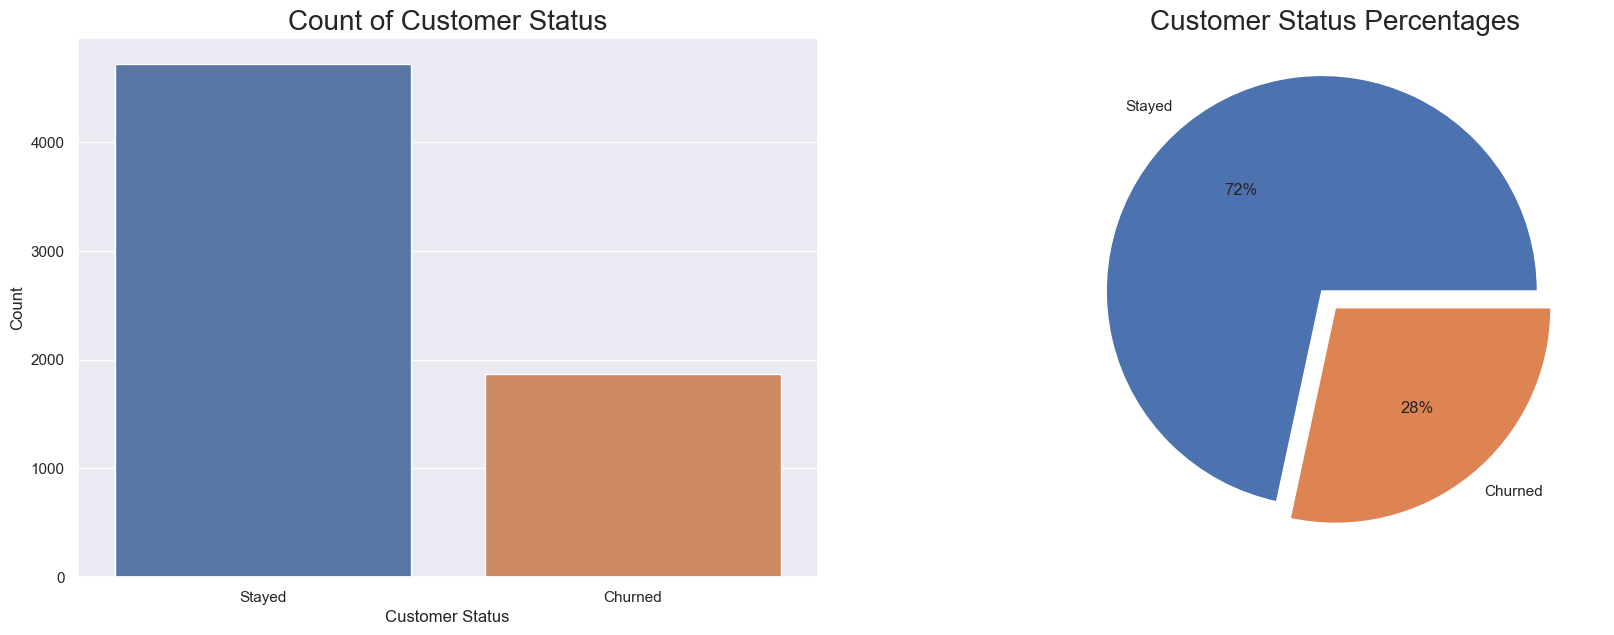

In [139]:
# defining the figure size

plt.figure(figsize = (21, 7))

# showing count plot for customer_status column

plt.subplot(1, 2, 1)
sns.countplot(x = 'customer_status', data = df_cln)
plt.title('Count of Customer Status', fontsize = 20)
plt.xlabel('Customer Status')
plt.ylabel('Count')

# showing pie plot for default_payment_next_month column

plt.subplot(1, 2, 2)
plt.pie(df_cln['customer_status'].value_counts(),labels = list(df_cln['customer_status'].value_counts().index),autopct = '%1.0f%%', explode=[0.1, 0])
plt.title('Customer Status Percentages', fontsize = 20)

plt.show()

Churn refers to customers leaving a product or service. It's like water leaking from a bucket. The churn rate is the number of customers lost divided by the total number of customers. High churn is a problem as it means losing customers faster than gaining new ones. 

From the plot above, it's clear that the majority of people, comprising 72%, prefer to stay rather than churn, while 28% choose to discontinue, which is a good thing. However, it leads to data <mark>imbalance</mark>, which will affect the result of the prediction.

### iv.ii Gender

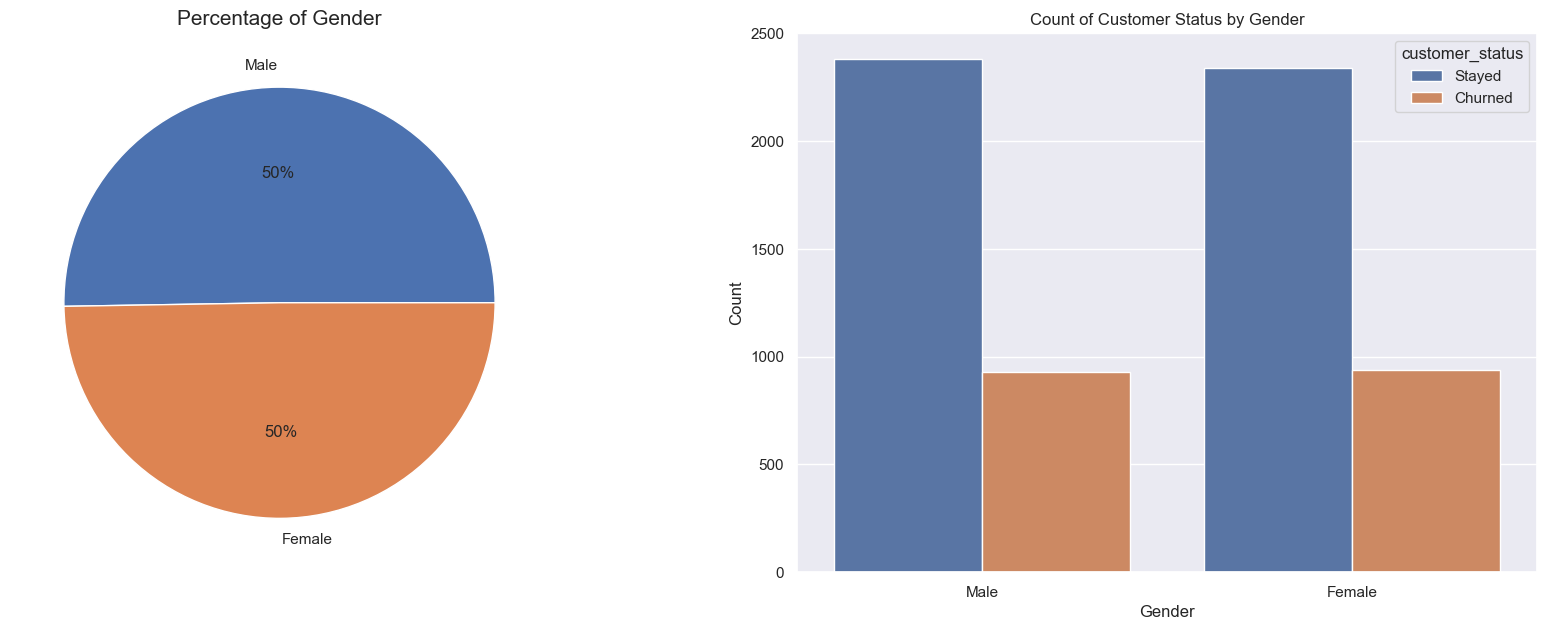

In [140]:
# defining the figure size

plt.figure(figsize=(21,7))

# pie chart of gender's percentage

plt.subplot(1, 2, 1)
plt.pie(df_cln['gender'].value_counts(), labels = list(df_cln['gender'].value_counts().index),autopct ='%1.0f%%')
plt.title('Percentage of Gender', fontsize = 15)

# count plot of gender by customer_status

plt.subplot(1, 2, 2)
sns.countplot(x = 'gender', data = df_cln, hue = 'customer_status', order = df_cln['gender'].value_counts().index)
plt.title('Count of Customer Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

Based on the plots above, it is evident that the number of male and female customers is approximately <mark>equal</mark>, indicating a balanced gender distribution. Additionally, there seems to be <mark>no apparent correlation</mark> between gender and churn status. This suggests that churn rates are not significantly influenced by gender. Other factors such as `age`, `marital status`, or interesting `offers` may have a stronger impact on customer churn.

### iv.iii Age

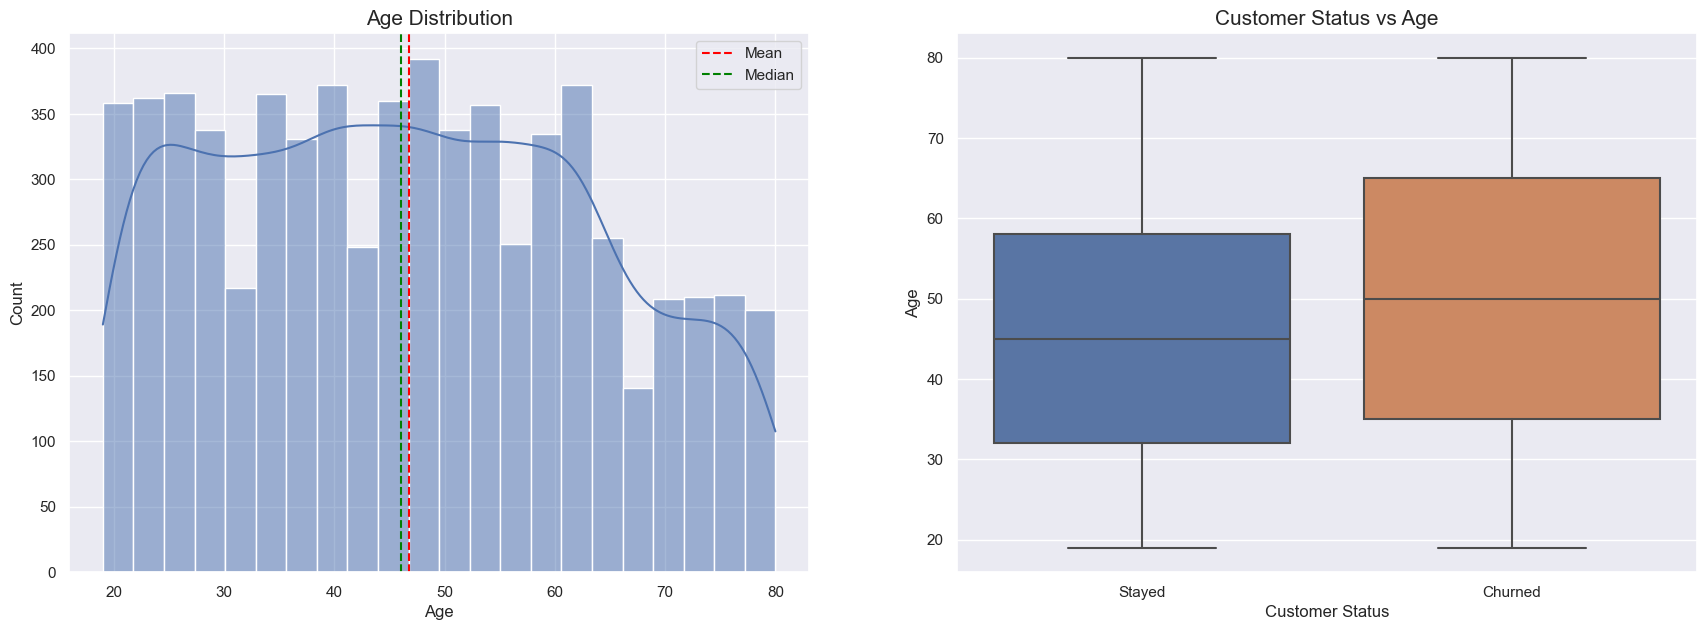

The skewness value of age column is: 0.149
The min value of age column is: 19
The max value of age column is: 80


In [141]:
# defining the figure size

plt.figure(figsize = (21, 7))

# histogram of age distrubution

plt.subplot(1, 2, 1)
sns.histplot(x = 'age', data = df_cln, kde = True)
plt.axvline(df_cln.age.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(df_cln.age.median(), color = 'green', linestyle = '--', label = 'Median')
plt.title('Age Distribution', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# box plot for age vs customer status

plt.subplot(1, 2, 2)
sns.boxplot(x = 'customer_status', y = 'age', data = df_cln)
plt.title('Customer Status vs Age', fontsize = 15)
plt.xlabel('Customer Status')
plt.ylabel('Age')

plt.show()

# checking skewness, min, and max values

print('The skewness value of age column is:', df_cln.age.skew().round(3))
print('The min value of age column is:', df_cln.age.min())
print('The max value of age column is:', df_cln.age.max())

Based on the plot, the age of customers ranges from 19 to 80 years old. The data distribution in the age column is <mark>symmetrical</mark>, which means it's evenly spread out. The skewness value of 0.149 confirms this. It's interesting to note that there is a <mark>correlation between age and churn status</mark>.

Customers who are <mark>older than 60 years tend to churn</mark> more often, meaning they are more likely to stop using the product or service. This information suggests that businesses should pay attention to the needs and preferences of older customers to reduce churn and retain their loyalty.

### iv.iv Marital Status

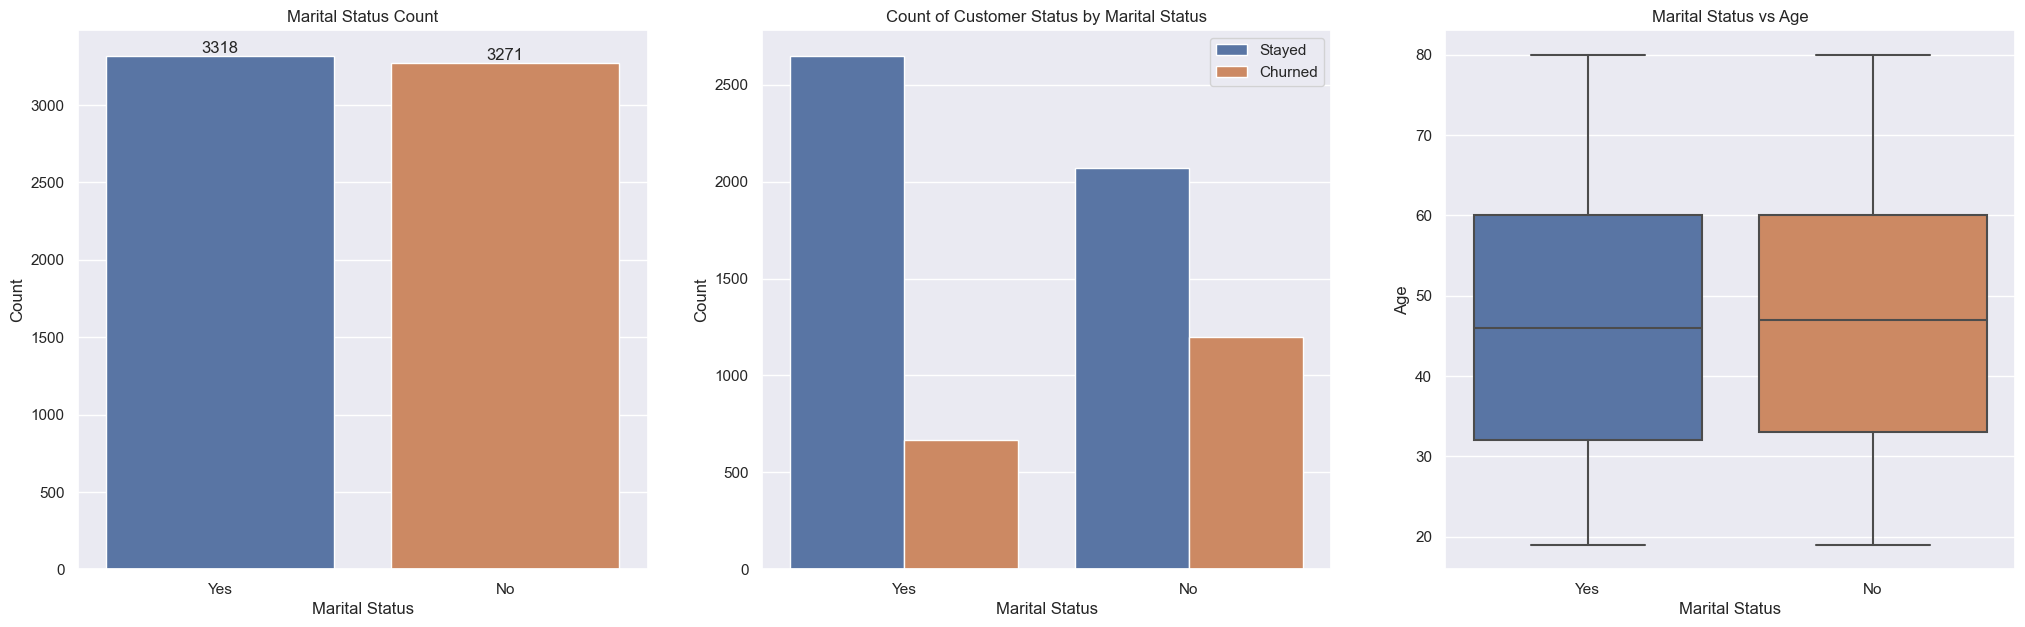

In [142]:
# defining the figure size

plt.figure(figsize = (25, 7))

# count plot of marital status

plt.subplot(1, 3, 1)
fig = sns.countplot(x = 'married', data = df_cln, order = df_cln.married.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 20,
             '{:1.0f}'.format(height),
             ha = 'center')
plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# count plot of customer status by marital status

plt.subplot(1, 3, 2)
sns.countplot(x = 'married', data = df_cln, hue = 'customer_status', order = df_cln['married'].value_counts().index)
plt.title('Count of Customer Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(loc='upper right')

# box plot of marital status by age

plt.subplot(1, 3, 3)
sns.boxplot(x = 'married', y = 'age', data = df_cln)
plt.title('Marital Status vs Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')

plt.show()

The number of married and unmarried individuals is <mark>roughly the same</mark>. Both groups fall between the ages of 30 and 60. Interestingly, married people are more likely to stay compared to those who are unmarried. 

This indicates that <mark>marital status influences customer retention</mark>. To retain customers, businesses should consider catering to the specific needs and preferences of married individuals.

### iv.v Tenure

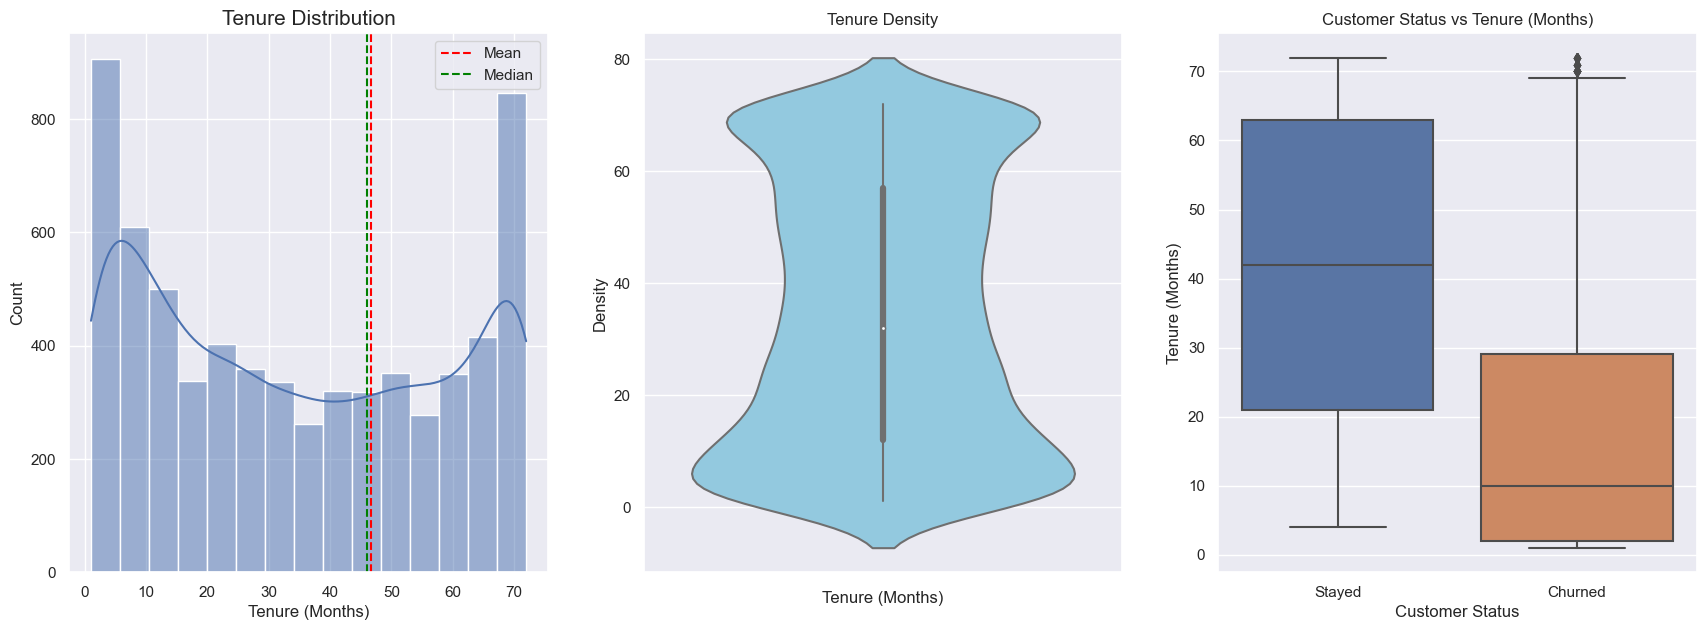

The skewness value of tenure column is: 0.155
The min value of tenure column is: 1
The max value of tenure column is: 72
The mean value of tenure column is: 34.0


In [143]:
# defining the figure size

plt.figure(figsize = (21, 7))

# histogram of tenure distrubution

plt.subplot(1, 3, 1)
sns.histplot(x = 'tenure_in_months', data = df_cln, kde = True)
plt.axvline(df_cln.age.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(df_cln.age.median(), color = 'green', linestyle = '--', label = 'Median')
plt.title('Tenure Distribution', fontsize = 15)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend()

# violin plot for tenure

plt.subplot(1, 3, 2)
sns.violinplot(data = df_cln, y = 'tenure_in_months', color='skyblue')
plt.title('Tenure Density')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')

# box plot of customer status by tenure

plt.subplot(1, 3, 3)
sns.boxplot(x = 'customer_status', y = 'tenure_in_months', data = df_cln)
plt.title('Customer Status vs Tenure (Months)')
plt.xlabel('Customer Status')
plt.ylabel('Tenure (Months)')

plt.show()

print('The skewness value of tenure column is:', df_cln.tenure_in_months.skew().round(3))
print('The min value of tenure column is:', df_cln.tenure_in_months.min())
print('The max value of tenure column is:', df_cln.tenure_in_months.max())
print('The mean value of tenure column is:', df_cln.tenure_in_months.mean().round(0))

Customers' tenure with the service ranges from a <mark>minimum of 1 month to a maximum of 72 months</mark>, with an <mark>average tenure of 35 months</mark>. The violin plot shows that the <mark>highest concentration of customers</mark> falls within the <mark>first 15 months</mark>. Interestingly, there is a significant <mark>increase in tenure around the 60-month</mark> mark.

Furthermore, there is a <mark>clear correlation between tenure and customer status</mark>: the longer customers use the service, the more likely they are to stay. This indicates that as customers become more experienced and engaged with the service over time, their loyalty strengthens, resulting in a lower likelihood of churning

### iv.vi Total Revenue

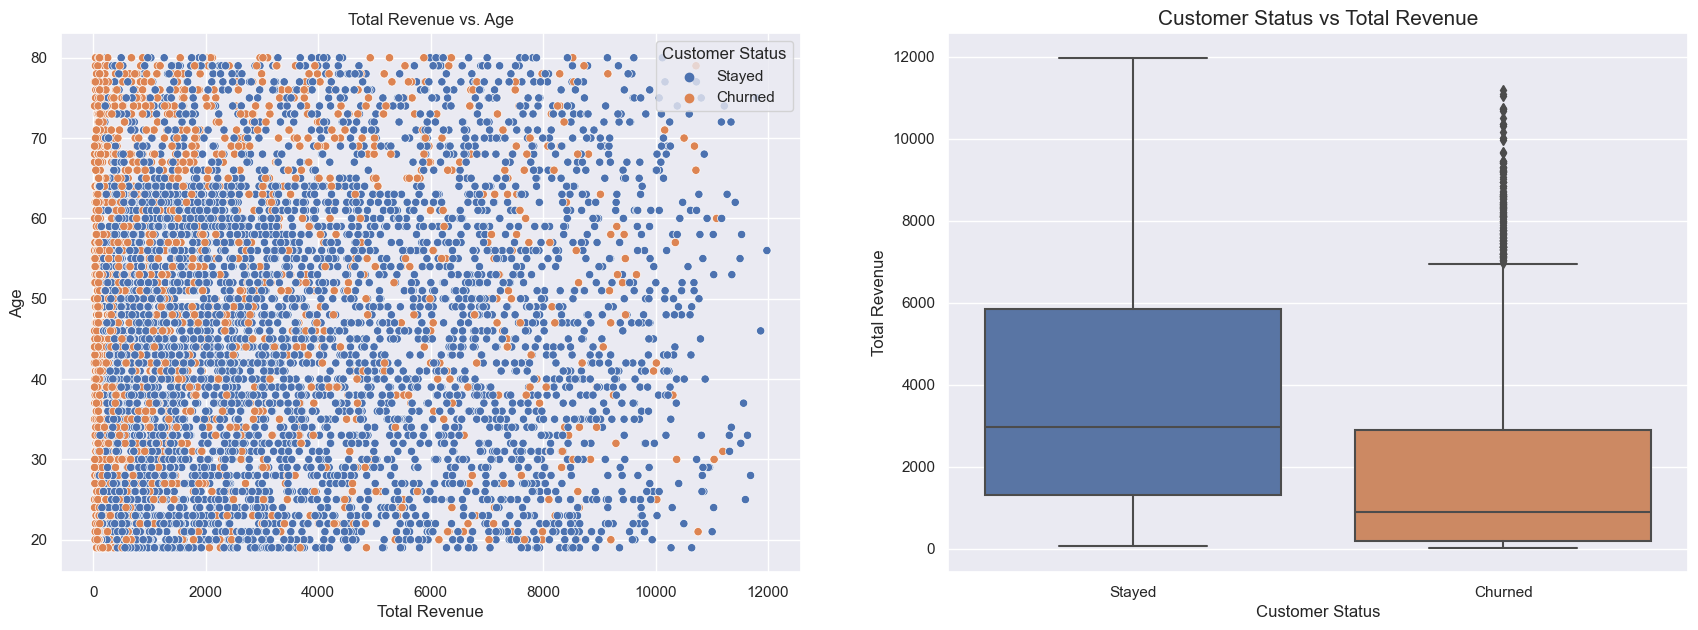

In [144]:
# defining the figure size

plt.figure(figsize = (21, 7))

# scatter plot for minimum payment vs installment purchase
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'total_revenue', y = 'age', hue = 'customer_status', data = df_cln)
plt.legend (title = 'Customer Status', loc='upper right')
plt.title('Total Revenue vs. Age')
plt.xlabel('Total Revenue')
plt.ylabel('Age')

# box plot for age vs customer status

plt.subplot(1, 2, 2)
sns.boxplot(x = 'customer_status', y = 'total_revenue', data = df_cln)
plt.title('Customer Status vs Total Revenue', fontsize = 15)
plt.xlabel('Customer Status')
plt.ylabel('Total Revenue')

plt.show()

There is a <mark>clear correlation</mark> between the total revenue generated by customers and their churn status. Generally, customers with <mark>lower total revenue</mark> are more likely to churn, while those with higher revenue tend to stay. This suggests that customers who <mark>contribute less financially</mark> are at a higher risk of <mark>discontinuing the service</mark>.

However, it's important to note that there are some <mark>outliers</mark> in the churned category. These outliers <mark>represent customers who churned despite having higher total revenue</mark>. These cases may be influenced by other factors such as dissatisfaction, changing needs, or external circumstances.

### iv.vii Calculating Correlation for All the Columns

In [145]:
# splitting the dataset into 2 parts in order make the correlation heat map easy to read

df_cln_cor1 = df_cln[['gender', 'age', 'married', 'number_of_dependents', 'city','number_of_referrals',
                      'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 
                      'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download',
                      'online_security', 'customer_status']].reset_index(drop = True)

df_cln_cor2 = df_cln.drop(columns=['gender', 'age', 'married', 'number_of_dependents', 'city','number_of_referrals',
                      'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 
                      'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download',
                      'online_security']).reset_index(drop = True)

interval columns not set, guessing: ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download']


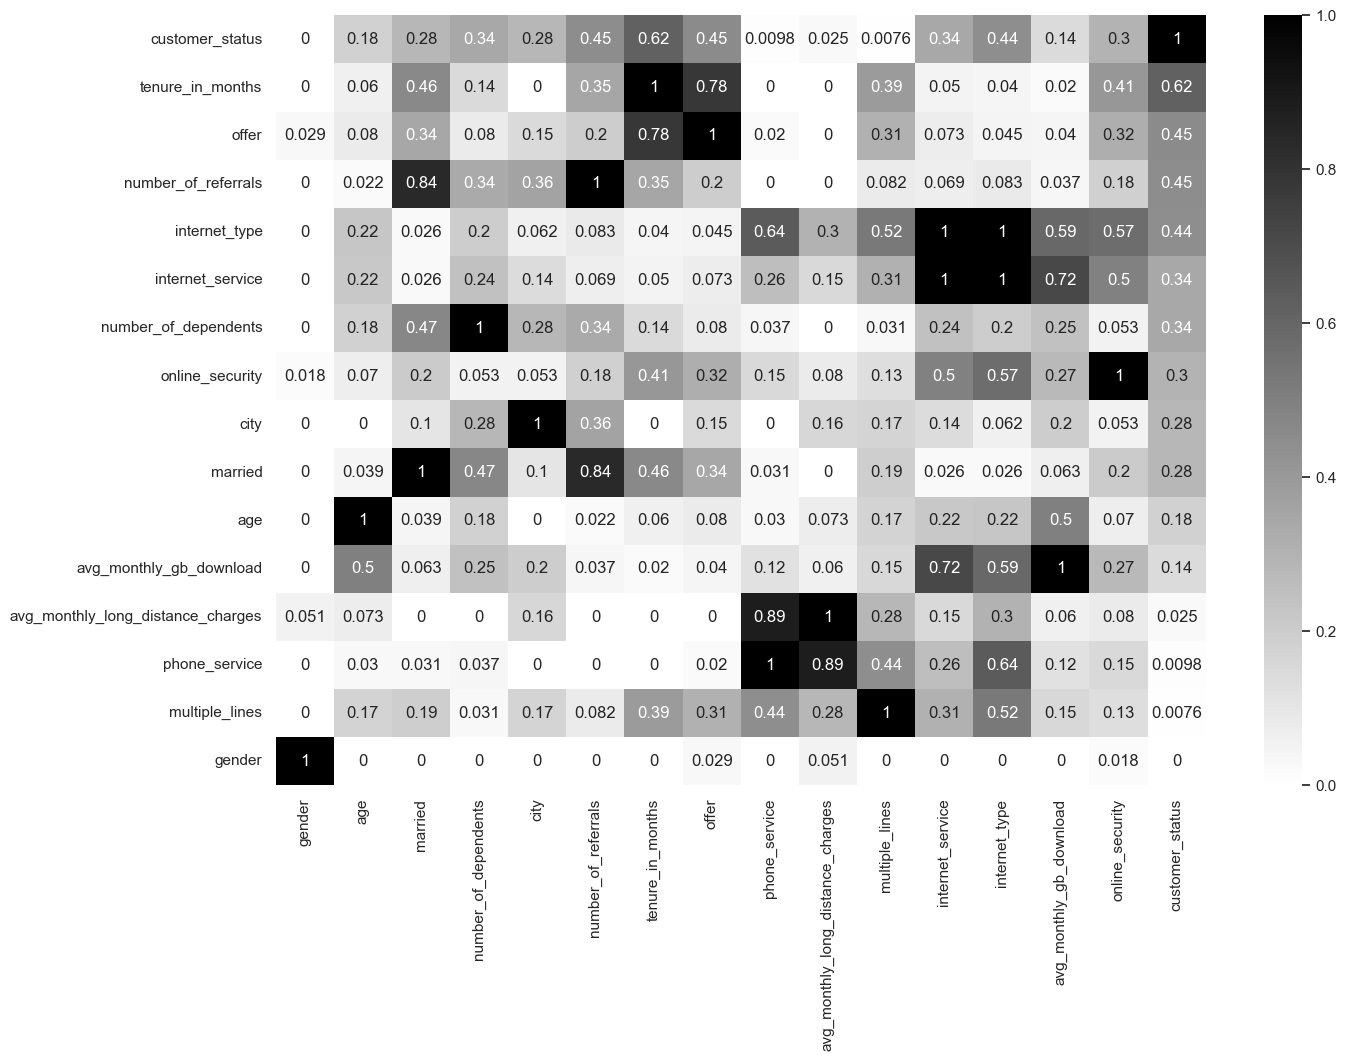

In [146]:
# calculating correlation for the df_cln_cor1

cor_tbl_1 = df_cln_cor1.phik_matrix()
cor_tbl_1.sort_values(by=['customer_status'], ascending=False, inplace=True)

# showing heat map for the correlation table

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_1, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

interval columns not set, guessing: ['monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


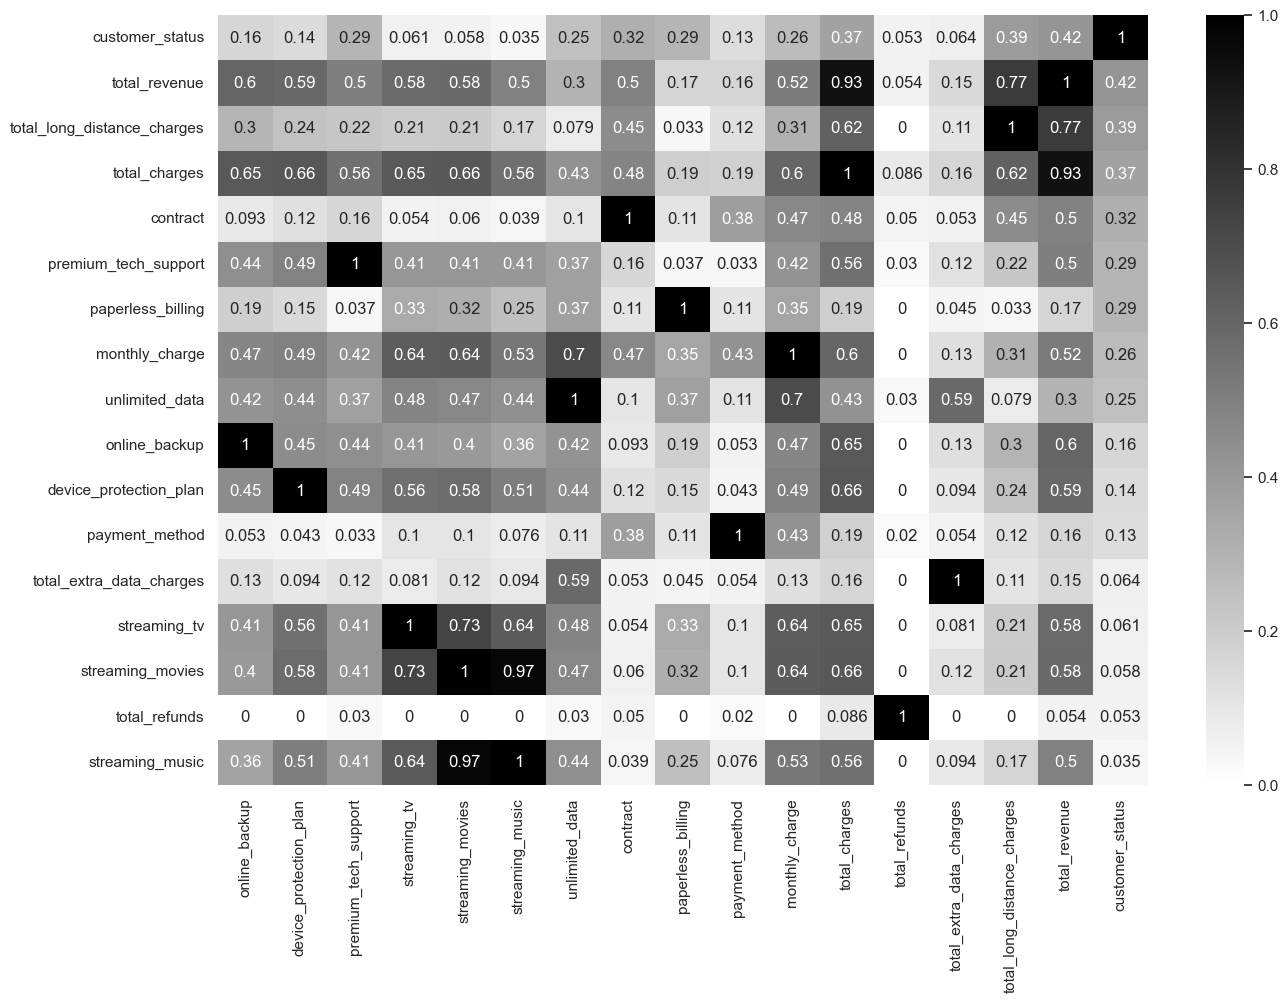

In [147]:
# calculating correlation for the df_cln_cor2

cor_tbl_2 = df_cln_cor2.phik_matrix()
cor_tbl_2.sort_values(by=['customer_status'], ascending=False, inplace=True)

# showing heat map for the correlation table

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_2, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

Based on the heat map analysis, we have identified several columns with correlation values <mark>exceeding 20%</mark>. To streamline the dataset, we will drop irrelevant columns such as `age`, `gender`, `total_refunds`, `payment_method`, and any other columns that have weak correlations with the target variable.

By removing these columns, we can focus on the more meaningful features that have a stronger relationship with the desired outcome. This will help simplify the dataset, reduce noise, and potentially improve the accuracy of our analysis or predictive models.

### iv.viii Cardinality

In this section, we will address the issue of high cardinality in the `city` column, which contains more than 1,000 unique values. The presence of such a large number of unique values can have a significant impact on performance and result in time-consuming encoding processes.

In [148]:
# changing the cities that mentioned less than 100 times as Others

city_counts = df_cln['city'].value_counts()  
rare_cities = city_counts[city_counts < 40].index

df_cln.loc[df_cln['city'].isin(rare_cities), 'city'] = 'Others'

In [149]:
# checking the value counts of city column after cardinality handling

df_cln.city.value_counts()

Others           5431
San Diego         278
Los Angeles       275
San Jose          110
Sacramento        102
San Francisco      97
Fresno             61
Long Beach         58
Escondido          48
Oakland            47
Stockton           41
Fallbrook          41
Name: city, dtype: int64

## v. Feature Engineering

### v.i Saving Inference Data

In this section, we will save 89 sample data from the main dataset. We will use this data for inference process later after training and validating the model.

In [150]:
# saving inference data

inference = df_cln.sample(89, random_state = 42)
inference.to_csv('Customer Churn Prediction Inference - ML.csv', index=False)

# removing the sample data from the main data

df_cln = df_cln.drop(inference.index)

inference

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
1919,Male,56,No,0,Sacramento,0,2,Offer E,Yes,6.47,...,Month-to-Month,Yes,Bank Withdrawal,45.15,98.50,0.00,0,12.94,111.44,Churned
4041,Male,49,Yes,0,Others,10,26,None,Yes,45.28,...,One Year,Yes,Bank Withdrawal,20.05,505.90,0.00,0,1177.28,1683.18,Stayed
1452,Female,29,Yes,2,Others,10,69,None,No,0.00,...,Two Year,No,Bank Withdrawal,46.25,3121.40,0.00,0,0.00,3121.40,Stayed
2457,Male,66,Yes,0,Others,6,65,None,Yes,32.08,...,One Year,Yes,Bank Withdrawal,100.75,6674.65,0.00,0,2085.20,8759.85,Stayed
3764,Male,59,Yes,1,Others,11,43,None,Yes,42.22,...,One Year,Yes,Credit Card,-2.00,4013.80,25.49,0,1815.46,5803.77,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,Male,74,No,0,Others,0,47,None,Yes,14.78,...,Two Year,No,Bank Withdrawal,59.60,2754.00,0.00,0,694.66,3448.66,Stayed
4967,Male,74,Yes,0,San Jose,1,16,Offer D,Yes,26.12,...,Month-to-Month,Yes,Credit Card,74.30,1178.25,0.00,0,417.92,1596.17,Churned
2842,Male,41,Yes,2,Others,3,68,None,Yes,31.40,...,Two Year,Yes,Bank Withdrawal,105.25,7173.15,0.00,0,2135.20,9308.35,Stayed
3082,Male,68,Yes,0,Others,3,20,None,Yes,27.56,...,One Year,No,Bank Withdrawal,107.05,2172.05,0.00,0,551.20,2723.25,Stayed


### v.ii Spliting the Data

In [151]:
# substituting the letter to numerical value for the target

df_cln['customer_status'] = df_cln['customer_status'].map({'Churned' : 1, 'Stayed': 0})

df_cln.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Female,37,Yes,0,Others,2,9,None,Yes,42.39,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,Others,0,9,None,Yes,10.69,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,Others,0,4,Offer E,Yes,33.65,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,Others,1,13,Offer D,Yes,27.82,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,Others,3,3,None,Yes,7.38,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


We will split the data into a training set (70%), and a testing set (30%).

In [152]:
# spliting the train-set and test-set

X = df_cln.drop('customer_status', axis=1)
y = df_cln.customer_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# checking the shape of train-set and test-set

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(4550, 31)
(1950, 31)
(4550,)
(1950,)


After we split the data, we can see that all the variables' rows and columns are the same. This indicates that the split process has finished without any problems.

### v.iii Feature Selection

In this section, we will carefully select the columns that will be included as features in our model. Based on the previous correlation calculations, we have identified several columns that need to be dropped due to their lack of significant correlation with the target variable or high correlation with other features. By eliminating these columns, we aim to improve the model's performance and avoid potential issues such as multicollinearity.

In [153]:
# dropping unnecessary columns

X_train = X_train.drop(columns=['age','avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'phone_service',
                                'multiple_lines','gender', 'online_backup', 'device_protection_plan', 'payment_method',
                                'total_extra_data_charges','streaming_tv', 'streaming_movies', 'streaming_music',
                                'total_refunds'], axis = 1).reset_index(drop = True)

X_test = X_test.drop(columns=['age','avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'phone_service',
                                'multiple_lines','gender', 'online_backup', 'device_protection_plan', 'payment_method',
                                'total_extra_data_charges','streaming_tv', 'streaming_movies', 'streaming_music',
                                'total_refunds'], axis = 1).reset_index(drop = True)

In [154]:
# showing the X_train values

X_train

,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,online_security,premium_tech_support,unlimited_data,contract,paperless_billing,monthly_charge,total_charges,total_long_distance_charges,total_revenue
0,Yes,0,Others,1,8,None,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,84.00,613.40,368.40,981.80
1,Yes,0,Others,6,49,None,Yes,DSL,No,No,No,Month-to-Month,Yes,52.15,2583.75,1392.58,4026.33
2,No,0,Others,0,16,Offer D,No,None,No,No,No,Month-to-Month,No,20.25,327.45,336.64,664.09
3,No,0,Others,0,36,Offer C,Yes,DSL,No,Yes,No,One Year,Yes,70.70,2511.95,1053.72,3625.67
4,No,0,San Diego,0,1,None,Yes,Fiber Optic,Yes,No,Yes,Month-to-Month,Yes,73.60,73.60,6.19,79.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Yes,3,Others,1,16,Offer D,Yes,Cable,No,No,No,Month-to-Month,Yes,35.50,552.70,0.00,632.70
4546,Yes,0,Others,5,55,None,Yes,Cable,No,No,Yes,One Year,No,51.65,2838.55,1624.15,4462.70
4547,No,0,Others,0,70,None,Yes,Fiber Optic,Yes,No,Yes,Two Year,Yes,111.15,7737.55,1620.50,9311.79
4548,Yes,0,San Francisco,0,1,None,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,73.55,73.55,36.92,110.47


In [155]:
# showing the X_test values

X_test

,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,online_security,premium_tech_support,unlimited_data,contract,paperless_billing,monthly_charge,total_charges,total_long_distance_charges,total_revenue
0,Yes,0,Others,1,56,None,Yes,Cable,Yes,Yes,Yes,One Year,Yes,68.45,4014.00,1501.92,5515.92
1,No,0,Others,0,51,None,No,None,No,No,No,Two Year,No,19.60,967.90,2420.46,3388.36
2,Yes,0,Others,1,62,Offer B,Yes,Cable,Yes,Yes,Yes,Two Year,Yes,84.95,5150.55,291.40,5437.27
3,No,0,Others,0,39,Offer C,Yes,DSL,No,Yes,Yes,Two Year,Yes,49.80,1971.15,153.27,2124.42
4,No,0,Others,0,72,None,Yes,Fiber Optic,Yes,Yes,Yes,Two Year,Yes,107.40,7748.75,2254.32,10003.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Yes,2,Others,3,37,Offer C,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,88.80,3340.55,39.96,3380.51
1946,Yes,0,Others,1,18,Offer D,Yes,Fiber Optic,Yes,No,Yes,Month-to-Month,No,74.80,1438.05,779.22,2217.27
1947,Yes,2,Others,8,56,Offer B,Yes,Cable,Yes,Yes,Yes,One Year,Yes,52.00,2884.90,0.00,2884.90
1948,No,0,Others,0,66,None,Yes,DSL,Yes,Yes,Yes,Two Year,Yes,62.50,4136.40,0.00,4136.40


### v.iv Missing Value Handling

There are <mark>no more missing values</mark> detected within this dataset; therefore, we can skip this step.

### v.v Outlier Handling

In this section, our objective is to identify outliers present in each numerical column of the dataset. We will adopt a specific approach to handle outliers by <mark>capping</mark> any values that fall below the <mark>20% threshold</mark> of the total data, if needed.

This will be achieved by implementing a pipeline to streamline the outlier detection and capping process. By applying this technique, we aim to mitigate the impact of outliers on our analysis and maintain data integrity within an acceptable range.

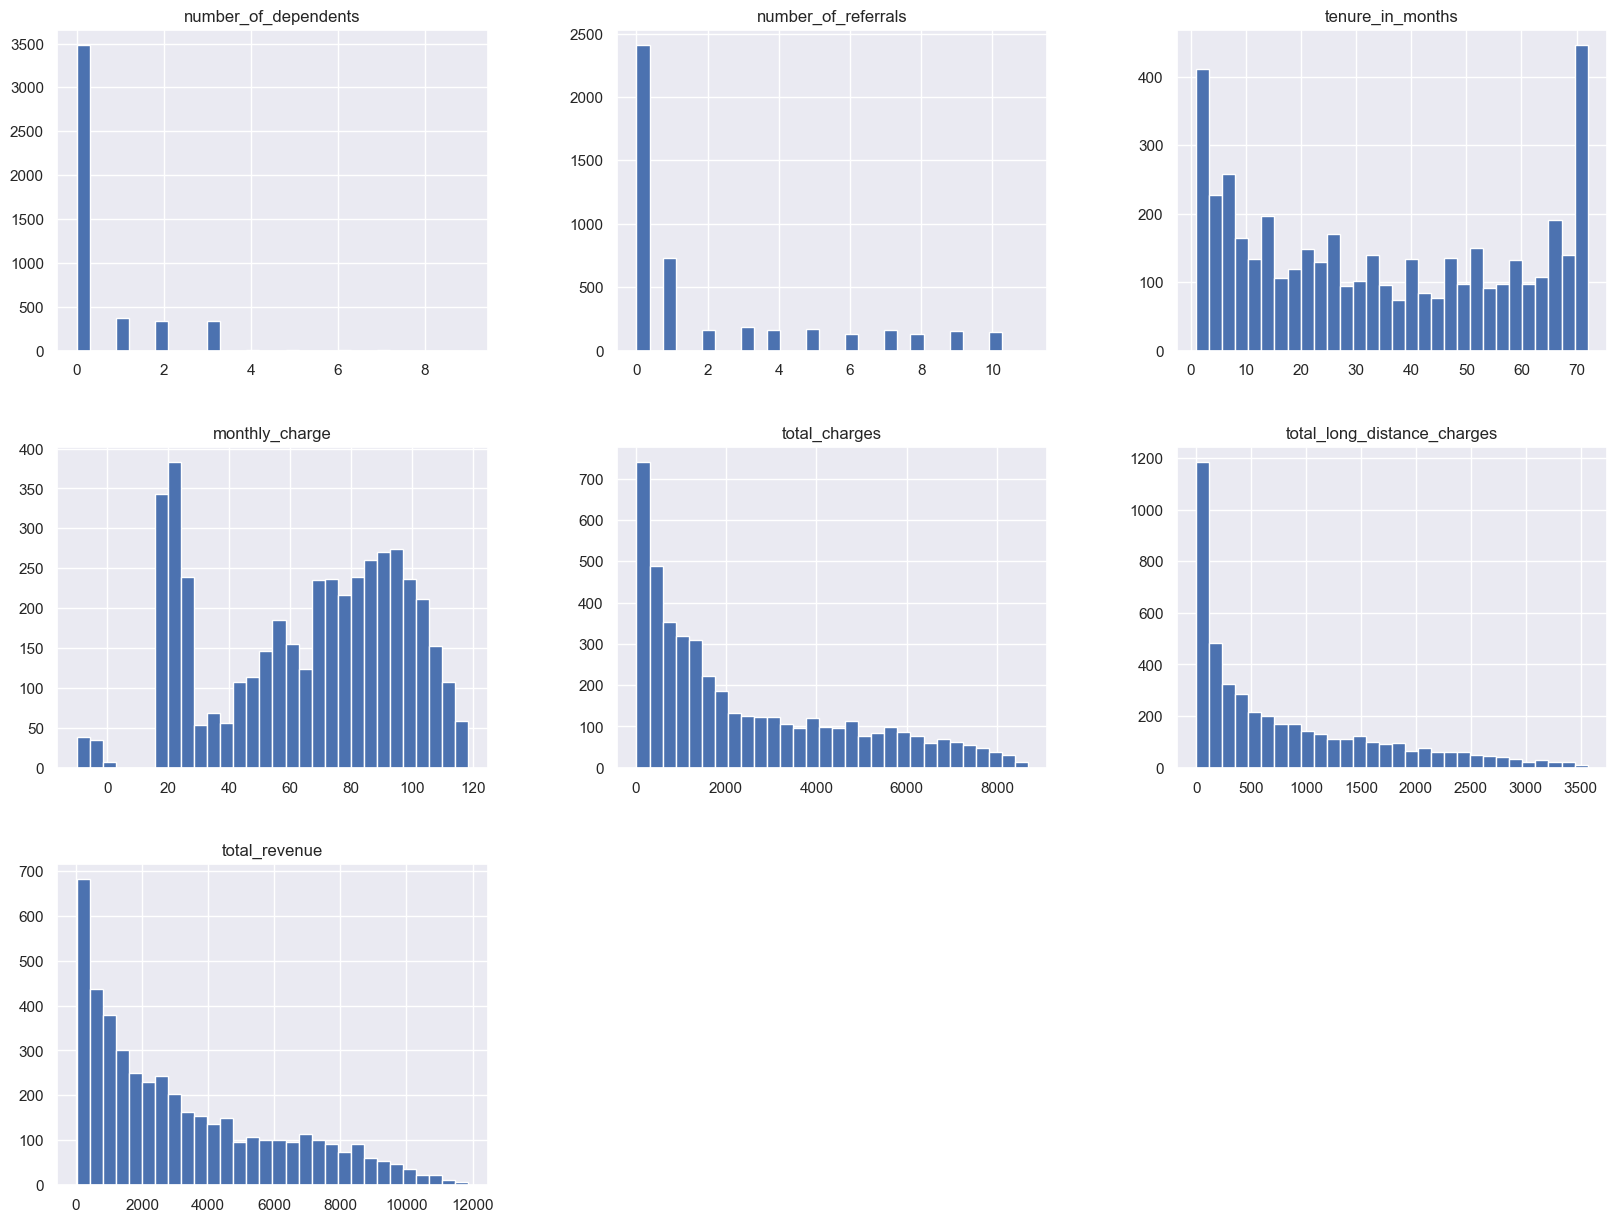

In [156]:
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

In [157]:
# making function for the outliers detection

def outlier_percent(X_train):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((X_train < minimum) | (X_train > maximum))
    num_total = X_train.count()
    return (num_outliers/num_total)*100

# printing how many percent of outliers in every numerical columns

for column in X_train.select_dtypes(include='number').columns:
    percent = str(round(outlier_percent(X_train[column]), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "number_of_dependents": 23.47%
Outliers in "number_of_referrals": 9.47%
Outliers in "tenure_in_months": 0.0%
Outliers in "monthly_charge": 0.0%
Outliers in "total_charges": 0.0%
Outliers in "total_long_distance_charges": 1.96%
Outliers in "total_revenue": 0.09%


Among the columns analyzed, only `number_of_dependents` has a percentage of outliers exceeding 20%. However, since this column consists of non-continuous data (e.g., discrete categories or counts), specific handling for outliers may not be necessary.

### v.vi Scaling Type Detection

In this section, our objective is to examine the distribution of each column within the dataset. By analyzing the distribution, we can determine the most suitable scaler to use for further data processing.

In [158]:
# checking the skewness value in every numerical column

for skew in df_cln.select_dtypes(include='number').columns:
    print(f'Skewness value in "{skew}": ', round(df_cln[skew].skew(), 2))

Skewness value in "age":  0.15
Skewness value in "number_of_dependents":  2.1
Skewness value in "number_of_referrals":  1.4
Skewness value in "tenure_in_months":  0.15
Skewness value in "avg_monthly_long_distance_charges":  0.05
Skewness value in "avg_monthly_gb_download":  1.2
Skewness value in "monthly_charge":  -0.34
Skewness value in "total_charges":  0.89
Skewness value in "total_refunds":  4.17
Skewness value in "total_extra_data_charges":  3.96
Skewness value in "total_long_distance_charges":  1.16
Skewness value in "total_revenue":  0.85
Skewness value in "customer_status":  0.96


It was shown that most of the columns are highly skewed, hence, we will use the PowerTransformer for our scaler. 

The <mark>PowerTransformer</mark> is a <mark>non-linear transformation</mark> that can be used to transform skewed data into a more normal distribution. This can improve the <mark>accuracy of machine learning models</mark> that are trained on the data.

### v.vii Making Pipeline

This is an attempt to create a pipeline to save time and effort. Automation is a powerful tool that can improve the efficiency and accuracy of our work. In this case, we are automating the process of handling outliers and scaling the data. This will help us to train more accurate machine learning models.

In [159]:
# pipeline for numerical columns type

num_pipeline = Pipeline([
        ('scaler', PowerTransformer()),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

num_tr = num_pipeline.fit_transform(X_train.select_dtypes(include='number'))

In [160]:
# pipeline for categorical columns with One Hot Encoder

ohe_pipeline = Pipeline([
        ('ohe', OneHotEncoder(sparse=False)),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

ohe_tr = ohe_pipeline.fit_transform(X_train[['city']])

In [161]:
# pipeline for categorical columns with Ordinal Encoder

mar_order = ['No', 'Yes']
prem_order = ['No', 'Yes']
unl_order = ['No', 'Yes']
ppr_order = ['No', 'Yes']
int_order = ['No', 'Yes']
sec_order = ['No', 'Yes']
of_order = ['Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E', 'None']
typ_order = ['Fiber Optic', 'Cable', 'DSL', 'None']
con_order = ['Two Year', 'One Year', 'Month-to-Month']

ord_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder(categories=[mar_order, of_order, int_order, typ_order, sec_order,
                                           prem_order, unl_order, con_order, ppr_order])),
        ('pca', PCA(n_components=.9, random_state = 42))
])

ord_tr = ord_pipeline.fit_transform(X_train.select_dtypes(include='object').drop(['city'], axis = 1))

In [162]:
# combining all scaling and encoding pipelines into one

preprocess = ColumnTransformer([
        ("num", num_pipeline, ['number_of_dependents', 'number_of_referrals', 'tenure_in_months','monthly_charge',
                               'total_charges', 'total_long_distance_charges', 'total_revenue']),
        ("ohe", ohe_pipeline, ['city']),
        ("ord", ord_pipeline, ['married', 'offer', 'internet_service', 'internet_type','online_security',
                                'premium_tech_support', 'unlimited_data', 'contract', 'paperless_billing'])
    ])

In [163]:
# making preprocessing pipeline with resampling

resample = Pipeline([   
        ('preprocess', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42))
c])

In [164]:
# applying resampling to X_train and y_train

X_train_final, y_train_final = resample.fit_resample(X_train, y_train)

In [165]:
# applying preprocessing to X_test

X_test_final = preprocess.transform(X_test)

In [166]:
# showing y_train value counts before resampling

y_train.value_counts()

0    3258
1    1292
Name: customer_status, dtype: int64

In [167]:
# showing y_train value counts after resampling

y_train_final.value_counts()

0    1629
1    1629
Name: customer_status, dtype: int64

## vi. Model Definition

In this assignment, we are tasked to make the models using <mark>Logistic Regression</mark>, <mark>SVC</mark>, <mark>Random Forest</mark>, <mark>KNN</mark>, and <mark>Naive Bayes</mark>.

In [168]:
# defining the models

logreg = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
ranfor = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
nvebys = GaussianNB()

Combining the preprocessing and the modeling process into pipeline.

In [169]:
# Logistic Regression Pipeline

logreg_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', LogisticRegression(random_state = 42))
        ])

# Support Vector Machine Pipeline

svc_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', SVC(random_state = 42))
        ])

# Random Forest Pipeline

ranfor_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', RandomForestClassifier(random_state = 42))
        ])

# K-Nearest Neighbors Pipeline

knn_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', KNeighborsClassifier())
        ])

# Naive Bayes Pipeline

nvebys_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', GaussianNB())
        ])

## vii. Model Training

In general, the purposes of training the model are to generalize well to new data, accurately predict or classify new data points, and enable decision-making. In this section, all baseline models will be trained.

In [170]:
# training the model with Logistic Regression

logreg.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [171]:
# training the model with SVC

svc.fit(X_train_final, y_train_final)

SVC(random_state=42)

In [172]:
# training the model with Random Forest

ranfor.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [173]:
# training the model with KNN

knn.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [174]:
# training the model with Naive Bayes

nvebys.fit(X_train_final, y_train_final)

GaussianNB()

## viii. Model Evaluation

### viii.i Predict and Cross Validation

In [175]:
# predict with Logistic Regression

logreg_train = logreg.predict(X_train_final)
logreg_test = logreg.predict(X_test_final)

print('Classification report for Logistic Regression train-set:')
print('')
print(classification_report(y_train_final, logreg_train))
print('*'*55)
print('Classification report for Logistic Regression test-set:')
print('')
print(classification_report(y_test, logreg_test))

Classification report for Logistic Regression train-set:

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1629
           1       0.81      0.86      0.83      1629

    accuracy                           0.83      3258
   macro avg       0.83      0.83      0.83      3258
weighted avg       0.83      0.83      0.83      3258

*******************************************************
Classification report for Logistic Regression test-set:

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1396
           1       0.64      0.87      0.74       554

    accuracy                           0.83      1950
   macro avg       0.79      0.84      0.80      1950
weighted avg       0.85      0.83      0.83      1950



In [176]:
# cross validation for Logistic Regression

logreg_scores = cross_val_score(logreg_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Logistic Regression (10 times validations): \n{logreg_scores}')
print('')
print(f'Recall cross validation mean value for Logistic Regression: {logreg_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Logistic Regression: {logreg_scores.std().round(2)}')
print('Recall cross validation range value for Logistic Regression: ', (logreg_scores.mean().round(2) - logreg_scores.std().round(2)) , '-', (logreg_scores.mean().round(2) + logreg_scores.std().round(2)))

Recall cross validation values for Logistic Regression (10 times validations): 
[0.83076923 0.85384615 0.87596899 0.81395349 0.86821705 0.82945736
 0.81395349 0.84496124 0.7751938  0.89147287]

Recall cross validation mean value for Logistic Regression: 0.84
Recall cross validation standard deviation value for Logistic Regression: 0.03
Recall cross validation range value for Logistic Regression:  0.8099999999999999 - 0.87


---

In [177]:
# predict with SVC

svc_train = svc.predict(X_train_final)
svc_test = svc.predict(X_test_final)

print('Classification report for SVC train-set:')
print('')
print(classification_report(y_train_final, svc_train))
print('*'*55)
print('Classification report for SVC test-set:')
print('')
print(classification_report(y_test, svc_test))

Classification report for SVC train-set:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1629
           1       0.84      0.86      0.85      1629

    accuracy                           0.85      3258
   macro avg       0.85      0.85      0.85      3258
weighted avg       0.85      0.85      0.85      3258

*******************************************************
Classification report for SVC test-set:

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1396
           1       0.69      0.85      0.76       554

    accuracy                           0.85      1950
   macro avg       0.81      0.85      0.82      1950
weighted avg       0.86      0.85      0.85      1950



In [178]:
# cross validation for SVC

svc_scores = cross_val_score(svc_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for SVC (10 times validations): \n{svc_scores}')
print('')
print(f'Recall cross validation mean value for SVC: {svc_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for SVC: {svc_scores.std().round(2)}')
print('Recall cross validation range value for SVC: ', (svc_scores.mean().round(2) - svc_scores.std().round(2)) , '-', (svc_scores.mean().round(2) + svc_scores.std().round(2)))

Recall cross validation values for SVC (10 times validations): 
[0.81538462 0.85384615 0.86046512 0.82170543 0.8372093  0.80620155
 0.80620155 0.88372093 0.76744186 0.86046512]

Recall cross validation mean value for SVC: 0.83
Recall cross validation standard deviation value for SVC: 0.03
Recall cross validation range value for SVC:  0.7999999999999999 - 0.86


---

In [179]:
# predict with Random Forest

ranfor_train = ranfor.predict(X_train_final)
ranfor_test = ranfor.predict(X_test_final)

print('Classification report for Random Forest train-set:')
print('')
print(classification_report(y_train_final, ranfor_train))
print('*'*55)
print('Classification report for Random Forest test-set:')
print('')
print(classification_report(y_test, ranfor_test))

Classification report for Random Forest train-set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00      1629

    accuracy                           1.00      3258
   macro avg       1.00      1.00      1.00      3258
weighted avg       1.00      1.00      1.00      3258

*******************************************************
Classification report for Random Forest test-set:

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1396
           1       0.69      0.82      0.75       554

    accuracy                           0.85      1950
   macro avg       0.81      0.84      0.82      1950
weighted avg       0.86      0.85      0.85      1950



In [180]:
# cross validation for Random Forest

ranfor_scores = cross_val_score(ranfor_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Random Forest (10 times validations): \n{ranfor_scores}')
print('')
print(f'Recall cross validation mean value for Random Forest: {ranfor_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Random Forest: {ranfor_scores.std().round(2)}')
print('Recall cross validation range value for Random Forest: ', (ranfor_scores.mean().round(2) - ranfor_scores.std().round(2)) , '-', (ranfor_scores.mean().round(2) + ranfor_scores.std().round(2)))

Recall cross validation values for Random Forest (10 times validations): 
[0.76153846 0.82307692 0.79844961 0.76744186 0.82945736 0.76744186
 0.78294574 0.85271318 0.75193798 0.75193798]

Recall cross validation mean value for Random Forest: 0.79
Recall cross validation standard deviation value for Random Forest: 0.03
Recall cross validation range value for Random Forest:  0.76 - 0.8200000000000001


---

In [181]:
# predict with KNN

knn_train = knn.predict(X_train_final)
knn_test = knn.predict(X_test_final)

print('Classification report for KNN train-set:')
print('')
print(classification_report(y_train_final, knn_train))
print('*'*55)
print('Classification report for KNN test-set:')
print('')
print(classification_report(y_test, knn_test))

Classification report for KNN train-set:

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1629
           1       0.87      0.88      0.87      1629

    accuracy                           0.87      3258
   macro avg       0.87      0.87      0.87      3258
weighted avg       0.87      0.87      0.87      3258

*******************************************************
Classification report for KNN test-set:

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1396
           1       0.66      0.84      0.74       554

    accuracy                           0.83      1950
   macro avg       0.80      0.83      0.81      1950
weighted avg       0.85      0.83      0.84      1950



In [182]:
# cross validation for KNN

knn_scores = cross_val_score(knn_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for KNN (10 times validations): \n{knn_scores}')
print('')
print(f'Recall cross validation mean value for KNN: {knn_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for KNN: {knn_scores.std().round(2)}')
print('Recall cross validation range value for KNN: ', (knn_scores.mean().round(2) - knn_scores.std().round(2)) , '-', (knn_scores.mean().round(2) + knn_scores.std().round(2)))

Recall cross validation values for KNN (10 times validations): 
[0.81538462 0.83846154 0.84496124 0.79069767 0.81395349 0.7751938
 0.8372093  0.84496124 0.72093023 0.79844961]

Recall cross validation mean value for KNN: 0.81
Recall cross validation standard deviation value for KNN: 0.04
Recall cross validation range value for KNN:  0.77 - 0.8500000000000001


---

In [183]:
# predict with Naive Bayes

nvebys_train = nvebys.predict(X_train_final)
nvebys_test = nvebys.predict(X_test_final)

print('Classification report for Naive Bayes train-set:')
print('')
print(classification_report(y_train_final, nvebys_train))
print('*'*55)
print('Classification report for Naive Bayes test-set:')
print('')
print(classification_report(y_test, nvebys_test))

Classification report for Naive Bayes train-set:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1629
           1       0.80      0.81      0.81      1629

    accuracy                           0.81      3258
   macro avg       0.81      0.81      0.81      3258
weighted avg       0.81      0.81      0.81      3258

*******************************************************
Classification report for Naive Bayes test-set:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1396
           1       0.62      0.78      0.69       554

    accuracy                           0.80      1950
   macro avg       0.76      0.80      0.77      1950
weighted avg       0.82      0.80      0.81      1950



In [184]:
# cross validation for Naive Bayes

nvebys_scores = cross_val_score(nvebys_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Naive Bayes (10 times validations): \n{nvebys_scores}')
print('')
print(f'Recall cross validation mean value for Naive Bayes: {nvebys_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Naive Bayes: {nvebys_scores.std().round(2)}')
print('Recall cross validation range value for Naive Bayes: ', (nvebys_scores.mean().round(2) - nvebys_scores.std().round(2)) , '-', (nvebys_scores.mean().round(2) + nvebys_scores.std().round(2)))

Recall cross validation values for Naive Bayes (10 times validations): 
[0.75384615 0.81538462 0.79069767 0.79069767 0.84496124 0.78294574
 0.79069767 0.79069767 0.74418605 0.7751938 ]

Recall cross validation mean value for Naive Bayes: 0.79
Recall cross validation standard deviation value for Naive Bayes: 0.03
Recall cross validation range value for Naive Bayes:  0.76 - 0.8200000000000001


---

In [185]:
# save cross validation  values into a dataframe

cv_data = [{'Model': 'Logistic Regression', 'Recall' : logreg_scores.mean().round(3), 'Std. Dev' : logreg_scores.std().round(2)},
             {'Model': 'SVC', 'Recall' : svc_scores.mean().round(3), 'Std. Dev' : svc_scores.std().round(2)},
             {'Model': 'Random Forest', 'Recall' : ranfor_scores.mean().round(3), 'Std. Dev' : ranfor_scores.std().round(2)},
             {'Model': 'KNN', 'Recall' : knn_scores.mean().round(3), 'Std. Dev' : knn_scores.std().round(2)},
             {'Model': 'Naive Bayes', 'Recall' : nvebys_scores.mean().round(3), 'Std. Dev' : nvebys_scores.std().round(2)}
]

cv_score = pd.DataFrame(cv_data).sort_values(by = 'Recall', ascending = False)

cv_score

,Model,Recall,Std. Dev
0,Logistic Regression,0.840,0.03
1,SVC,0.831,0.03
3,KNN,0.808,0.04
2,Random Forest,0.789,0.03
4,Naive Bayes,0.788,0.03


---

In the last process, we ran and did <mark>cross-validation</mark> for <mark>all the models</mark> in order to get the metric scores for each model. In this case, our focus is on the <mark>recall</mark> score rather than the accuracy or precision score. Our objective is to <mark>minimize false negatives</mark> and ensure all positive instances are identified.

For example, when the value of `customer_status` is <mark>Churned</mark>, it means we predict that individuals will <mark>stop</mark> to use the service. While a <mark>Stayed</mark>, means that we predict that a particular person will <mark>continue</mark> using the service.

In this case, our <mark>false negative</mark> is when our prediction is a <mark>Stayed (0)</mark>, but in <mark>reality</mark>, that person will be the next customer who <mark>Churned (1)</mark> from the platform. That is why we use <mark>recall</mark> value as our <mark>performance measuring stick</mark>.

Referring to the reports above, we have seen the <mark>classification reports</mark> for train sets and test sets of all models. Not to mention, <mark>cross-validation reports</mark> for all models are also presented. By checking back all the cross-validation reports, we can gather the <mark>mean</mark> and <mark>standard deviation</mark> of recall values for all models.

<mark>Logistic Regression</mark> produced the best recall value for this case with 0.840 and a standard deviation of 0.03. The second place is SVC, with a 0.831 recall value and a 0.03 standard deviation value. In last place is <mark>Naive Bayes</mark> with a recall value of 0.788 and a standard deviation value of 0.03. KNN and Random Forest are in third and fourth place, respectively.

In general, every model <mark>but Random Forest are having a good statistical fit</mark>. While the <mark>Logistic Regression</mark> model boasts the <mark>highest recall value</mark>, we have <mark>chosen not to further fine-tune it</mark>. We see that SVC produced more balanced results between class 0 and 1. Moreover, the <mark>difference in recall scores between the two models is minimal</mark>. Consequently, we will <mark>focus on tuning the SVC</mark>, as it shows promise in capturing the underlying patterns effectively and generalizing well to unseen data.

### viii.ii Hyperparameters Tuning

Although Logistic Regression had a better recall score for a minute margin, we opted to choose Support Vector Classifier (SVC) to be tuned. Therefore, we will tune the hyperparameters of SVC.

In [186]:
# SVC hyperparameter combinations

svc_params = {'classifier__C': [0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'classifier__gamma': ['auto', 'scale'],
              'classifier__class_weight' : ['balanced']
              }

grid_svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1, scoring='recall')
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          PowerTransformer()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.9,
                                                                                              random_state=42))]),
                                                                         ['number_of_dependents',
                                                                          'number_of_referrals',
                                                                          'tenure_in_months',
                                                                          'monthly_charge',
                                                                          'total_charges',
                                                                          'total_long_distance_charges',
                                                                          'total_revenue']),
                                                                        ('ohe',
                                                                         Pip...
                                        SMOTENC(categorical_features=[7, 8, 9,
                                                                      10, 11,
                                                                      12, 13,
                                                                      14, 15],
                                                random_state=42,
                                                sampling_strategy=0.5)),
                                       ('under',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__class_weight': ['balanced'],
                         'classifier__gamma': ['auto', 'scale'],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='recall')

In [187]:
# applying the best hyperparamater to the model and showing it

svc_tuned = grid_svc.best_estimator_

print('SVC Best Hyperparameter:')
print(grid_svc.best_params_)

SVC Best Hyperparameter:
{'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}


Recall score for SVC Tuned test-set: 0.89

Classification report for SVC Tuned test-set:

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1396
           1       0.61      0.89      0.73       554

    accuracy                           0.81      1950
   macro avg       0.78      0.83      0.79      1950
weighted avg       0.85      0.81      0.82      1950


Confusion Matrix for SVC Tuned test-set:


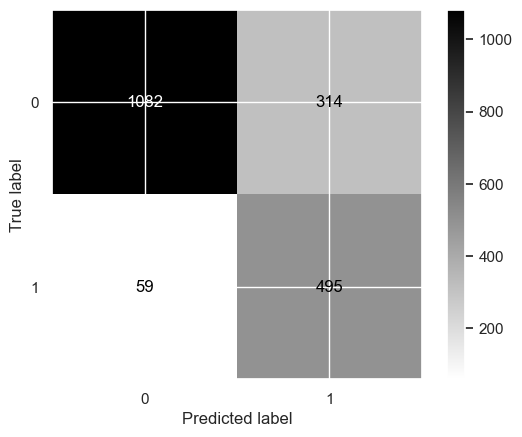

In [188]:
# predict with tuned hyperparameters

svc_tuned_test = svc_tuned.predict(X_test)

print('Recall score for SVC Tuned test-set:', recall_score(y_test, svc_tuned_test).round(2))
print('')
print('Classification report for SVC Tuned test-set:')
print('')
print(classification_report(y_test, svc_tuned_test))
print('')
print('Confusion Matrix for SVC Tuned test-set:')
print(ConfusionMatrixDisplay.from_estimator(svc_tuned, X_test, y_test, cmap='binary'))

In [189]:
# cross validation for SVC Tuned

svc_tuned_scores = cross_val_score(svc_tuned, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for SVC Tuned (10 times validations): \n{svc_tuned_scores}')
print('')
print(f'Recall cross validation mean value for SVC Tuned: {svc_tuned_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for SVC Tuned: {svc_tuned_scores.std().round(2)}')
print('Recall cross validation range value for SVC Tuned: ', (svc_tuned_scores.mean().round(2) - svc_tuned_scores.std().round(2)) , '-', (svc_tuned_scores.mean().round(2) + svc_tuned_scores.std().round(2)))

Recall cross validation values for SVC Tuned (10 times validations): 
[0.86923077 0.90769231 0.89147287 0.85271318 0.89147287 0.88372093
 0.84496124 0.89922481 0.82170543 0.89922481]

Recall cross validation mean value for SVC Tuned: 0.88
Recall cross validation standard deviation value for SVC Tuned: 0.03
Recall cross validation range value for SVC Tuned:  0.85 - 0.91


In [190]:
# showing the before and after tuned scores

svc_data = [{'Model': 'SVC Baseline', 'Recall' : svc_scores.mean().round(3), 'Std. Dev' : svc_scores.std().round(2)},
             {'Model': 'SVC Tuned', 'Recall' : svc_tuned_scores.mean().round(3), 'Std. Dev' : svc_tuned_scores.std().round(2)}
]

svc_compare = pd.DataFrame(svc_data).sort_values(by = 'Recall', ascending = False)

svc_compare

,Model,Recall,Std. Dev
1,SVC Tuned,0.876,0.03
0,SVC Baseline,0.831,0.03


The report compares a tuned Support Vector Classifier (SVC) with a baseline model. The tuned SVC achieved a higher recall score of 0.876, indicating its ability to correctly identify positive instances, compared to the baseline's score of 0.831. Hyperparameter tuning, adjusting parameters like C, class_weight, gamma, and kernel, improved the tuned model's performance. 

The confusion matrix analysis revealed a substantial reduction in false negatives (59 instances) for the tuned model, showcasing its improved predictive capability, especially in identifying the minority class. 

Overall, the report highlights the efficacy of hyperparameter tuning in enhancing the SVC model's accuracy and underscores the superiority of the tuned model over the baseline.

## ix. Model Saving

In this session, we will save all the needed files so that we can run the model inference flawlessly and efficiently.

In [191]:
# preparation for SVC model saving

all_process_svc_tuned = Pipeline([
    ('preprocessing', preprocess),
    ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
    ('under', RandomUnderSampler(random_state = 42)),
    ('classifier', SVC(C = 0.1, class_weight = 'balanced', gamma = 'auto', kernel = 'poly', random_state = 42))
])

all_process_svc_tuned.fit(X_train, y_train)

svc_tuned_result = all_process_svc_tuned.predict(X_test)

print(classification_report(y_test, svc_tuned_result))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1396
           1       0.61      0.89      0.73       554

    accuracy                           0.81      1950
   macro avg       0.78      0.83      0.79      1950
weighted avg       0.85      0.81      0.82      1950



In [192]:
# save the model

pickle.dump(all_process_svc_tuned, open('svc_tuned_pred.pkl', 'wb'))

## x. Model Inference

Model Inference will be done in the other notebook in order to avoid any errors, and it is an attempt to get as accurate results as possible.

## xi. Conclusion

Churn refers to customers leaving a product or service, and a high churn rate can be problematic. In the provided plot, 72% of customers choose to stay, while 28% churn, leading to data imbalance. Gender does not seem to have a significant correlation with churn rates, indicating other factors may play a stronger role. Age, however, shows a correlation, with older customers, particularly those over 60, more likely to churn. Marital status also influences churn, with married individuals showing higher retention rates. Tenure with the service and total revenue both exhibit correlations, as longer tenure and higher revenue contribute to lower churn rates. Nonetheless, outliers exist where customers with higher revenue still churn, possibly due to other factors.

The evaluation metric score used in this case is <mark>recall</mark>, which measures the proportion of true positive predictions out of all actual positive instances. Recall is valuable when the objective is to minimize false negatives and ensure all positive instances are identified. For example, if we predict that a particular person is going to stay, but in reality that person is leaving the subscription, this is what we call a false negative in our case, and we want to minimize this case as much as possible because it could impact the business in a bad way. The <mark>possible losses</mark> that can occur if we predict the churn status wrongly are: Missed Retention Opportunities, Customer Dissatisfaction, Wasted Resources, Lost Revenue, and Reputation Damage.

The SVC model demonstrates strong statistical fit, as evidenced by comparing metrics scores between the train-set and test-set. Despite Logistic Regression displaying a higher recall score, SVC was selected for tuning due to its ability to produce more balanced results. Both models exhibit good fit in terms of statistical measures, but the decision to focus on tuning SVC was driven by the aim to achieve a more balanced outcome.

The <mark>strength</mark> of our model is effective in handling complex data. SVC performs well when dealing with high-dimensional data or datasets with complex decision boundaries. It can effectively capture non-linear relationships and patterns, making it suitable for churn prediction tasks where the relationships between features and churn can be intricate, which will benefit the company tremendously.

While the <mark>weakness</mark> of our model is sensitive to hyperparameters. SVC performance heavily depends on the selection of hyperparameters, such as the regularization parameter (C), kernel type, and kernel-specific parameters. Improper tuning of these hyperparameters may result in suboptimal performance or overfitting, requiring careful optimization, wide domain knowledge, and the professionals to run the model properly.

In order to <mark>improve</mark> future results, several key areas can be addressed. Firstly, conducting more thorough <mark>feature engineering</mark> can help identify important features that effectively differentiate between classes. Secondly, <mark>exploring</mark> a wider range of <mark>algorithms</mark> can lead to the selection of the most suitable one for the dataset. Thirdly, <mark>utilizing algorithms</mark> specifically designed to handle <mark>imbalanced</mark> datasets can improve performance. Lastly, <mark>hyperparameter tuning</mark> should be carefully performed to find the optimal balance without overfitting. By focusing on these areas, future iterations can enhance the churn prediction model, leading to more accurate and reliable results.

____